In [1]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import os
import sys
sys.path.append("/home/oscar/Documents/Thesis/Code/scripts")
import plot_tools

In [2]:
def find_tree_name(uproot_file):
    if 'ROOTDirectory' in str(type(uproot_file)):
        if len(uproot_file.keys())>1:
            print('WARNING! More than one tree, please implement the logic to handle it')
        else:
            return uproot_file.keys()[0].decode()
    else:
        return 'TRUE'

In [3]:
file_path_OnlyGen = "/home/oscar/Documents/Thesis/Efficencies/MC/Python/MC_OnlyGen_uuK.root:ntuple"
file_path_RecoGen = "/home/oscar/Documents/Thesis/Efficencies/MC/Python/MC_RecoGen_uuK.root:ntuple"
file_path_Gen     = "/home/oscar/Documents/Thesis/Efficencies/MC/Python/MC_JPsiK_hyperOpt_v3.root:treeBu"

In [4]:
file_OnlyGen = uproot.open(file_path_OnlyGen)
file_RecoGen = uproot.open(file_path_RecoGen)
file_Gen     = uproot.open(file_path_Gen)

In [5]:
# DataFrame with NO filter
df_OnlyGen = file_OnlyGen.arrays(["massJ","muon1Pt","muon2Pt","kaonPt", "muon1Eta", "muon2Eta", "kaonEta"],library="pd")
df_RecoGen = file_RecoGen.arrays(["massJ","muon1Pt","muon2Pt","kaonPt", "muon1Eta", "muon2Eta", "kaonEta"],library="pd")
df_Gen     = file_Gen.arrays(["massJ", "XGB_auc"], library="pd")

In [6]:
print(df_OnlyGen)
print(df_RecoGen)
print(df_Gen)

             massJ   muon1Pt    muon2Pt    kaonPt  muon1Eta  muon2Eta  \
0         2.766604  0.504426  10.436558  3.009766  2.903036  3.073026   
1         1.083693  1.744392   3.910197  1.579102 -2.753347 -2.598758   
2         3.149153  3.704844   0.560696  3.765625 -1.022268 -1.866186   
3         1.792429  2.211226   2.561367  3.419922  2.075412  2.369098   
4         0.362277  0.966070   1.854340  0.835449  0.166344  0.076894   
...            ...       ...        ...       ...       ...       ...   
11632520  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
11632521  3.583299  1.952375   2.466572  0.528320  1.125600  0.359760   
11632522  2.207737  2.081720   0.611043  0.900391  2.692205  2.330763   
11632523  3.065101  3.345045   2.753091  0.606934 -1.780447 -1.829682   
11632524  3.131828  1.776298   2.890214  2.109375 -2.388269 -3.162754   

           kaonEta  
0         3.740840  
1        -3.269235  
2        -0.517668  
3         3.106125  
4        -2.150345

In [7]:
for x in [df_Gen, df_OnlyGen, df_RecoGen]:
    print(len(x))

2810802
11632525
20482652


In [8]:
bindiv = [1.1, 2.0, 4.3, 8.8804, 10.3041, 12.8881, 14.303524, 16, 18, 22]
Nbin = len(bindiv) - 1

Primero trabajaremos con la aceptancia:

In [9]:
nentries_prei = len(df_OnlyGen)
print("Total entries in MC with NO filter:", nentries_prei)

Total entries in MC with NO filter: 11632525


In [10]:
df_OnlyGen["massJ2"] = df_OnlyGen["massJ"] * df_OnlyGen ["massJ"]

In [11]:
df_prei_OnlyGen = df_OnlyGen.query("abs(muon1Eta)>0.0001")
df_pref_OnlyGen = df_OnlyGen.query("muon1Pt>3.5 & abs(muon1Eta)<=2.5 & muon2Pt>3.5 & abs(muon1Eta)<=2.5 & kaonPt>0.5 & abs(kaonEta)<=2.5 & abs(muon1Eta)>0.0001")

nentries_prei = len(df_prei_OnlyGen)
print("Total entries in MC with filters by hand:", nentries_prei)
nentries_pref = len(df_pref_OnlyGen)
print("Total entries in MC with filters by hand:", nentries_pref)

print("La aceptancia general es: ", nentries_pref/nentries_prei)

aceptancia = nentries_pref/nentries_prei

Total entries in MC with filters by hand: 11447109
Total entries in MC with filters by hand: 385092
La aceptancia general es:  0.033640983063933434


In [12]:
hist_pre1_OnlyGen, _ = np.histogram(df_prei_OnlyGen["massJ2"], bins=bindiv)
hist_pre2_OnlyGen, _ = np.histogram(df_pref_OnlyGen["massJ2"], bins=bindiv)  

In [15]:
print(hist_pre1_OnlyGen)
print(hist_pre2_OnlyGen)

ErrPreOnly =  np.sqrt(hist_pre1_OnlyGen)
ErrAftOnly =  np.sqrt(hist_pre2_OnlyGen)

print(ErrPreOnly)
print(ErrAftOnly)

[ 556412 1395999 2748608  835170 1470780  771377  878251  935029 1177424]
[14622 37416 78686 25745 48878 28201 34137 39479 58792]
[ 745.93029165 1181.52401584 1657.89263826  913.87635925 1212.75718922
  878.28070684  937.15046817  966.96897572 1085.09170119]
[120.92146211 193.43215865 280.51024937 160.45248518 221.08369456
 167.93153367 184.76200908 198.69323089 242.47061678]


In [18]:
accep = np.divide(hist_pre2_OnlyGen, hist_pre1_OnlyGen)
accepErr = accep * np.sqrt(((ErrPreOnly/hist_pre1_OnlyGen)*(ErrPreOnly/hist_pre1_OnlyGen))+((ErrAftOnly/hist_pre2_OnlyGen)*(ErrAftOnly/hist_pre2_OnlyGen)))
print(accep)
print(accepErr)

[0.02627909 0.02680231 0.02862758 0.03082606 0.03323271 0.0365593
 0.0388693  0.04222222 0.04993273]
[0.00022016 0.00014041 0.00010351 0.00019506 0.00015279 0.00022165
 0.00021442 0.00021694 0.00021101]


In [19]:
bindiv = np.array(bindiv)

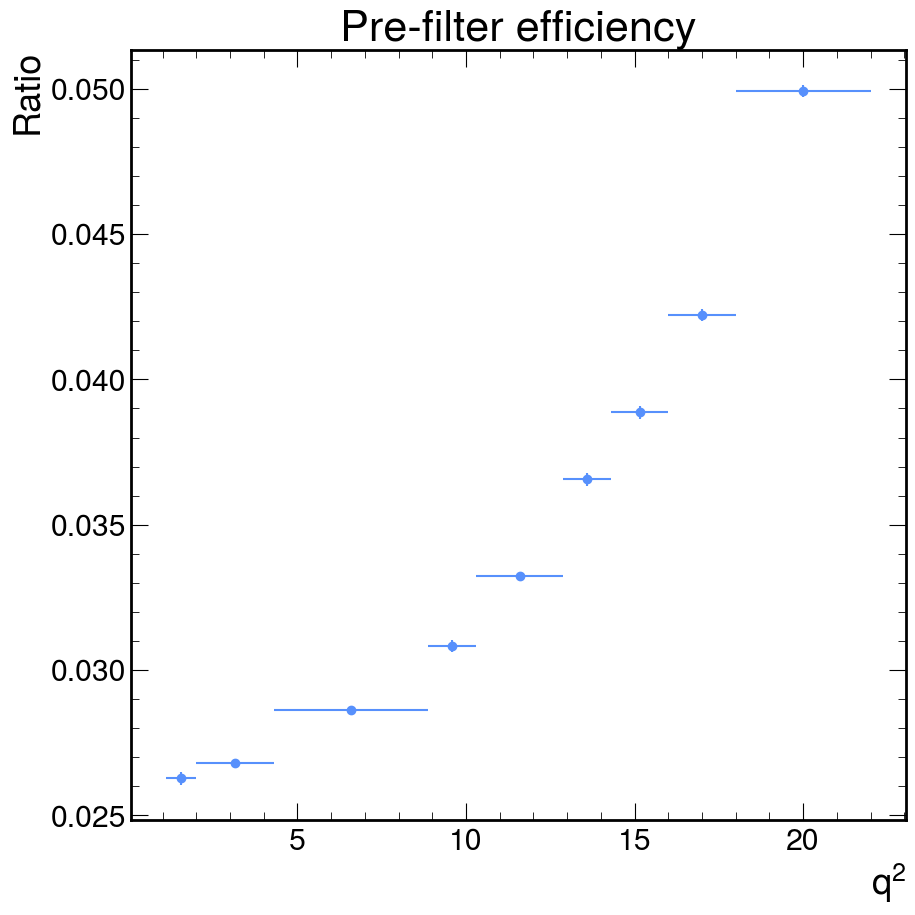

In [21]:
plt.figure()
bin_centers = (bindiv[1:] + bindiv[:-1]) / 2
bin_widths = np.diff(bindiv)
plt.errorbar(x=bin_centers, y=accep, xerr=bin_widths / 2, yerr=accepErr, fmt='o')
plt.title("Pre-filter efficiency")
plt.xlabel("$q^2$")
plt.ylabel("Ratio")
plt.show()

**Ahora vamos con la eficiencia de reco**

In [22]:
df_RecoGen["massJ2"] = df_RecoGen["massJ"] * df_RecoGen ["massJ"]
df_Gen["massJ2"] = df_Gen["massJ"] * df_Gen["massJ"]

In [23]:
df_pref_RecoGen = df_RecoGen.query("muon1Pt>3.5 & abs(muon1Eta)<=2.5 & muon2Pt>3.5 & abs(muon1Eta)<=2.5 & kaonPt>0.5 & abs(kaonEta)<=2.5 & abs(muon1Eta)>0.0001")

nentries_pref = len(df_pref_RecoGen)
print("Total entries in MC with filters by hand:", nentries_pref)

Total entries in MC with filters by hand: 10750363


In [24]:
df_pref_Gen = df_Gen.query("XGB_auc>(0.9983-0.003)")

nentries_prei = len(df_pref_Gen)
print("Total entries in MC with filters by hand:", nentries_prei)

Total entries in MC with filters by hand: 1527682


In [25]:
print("Total Reco Efficiency: ", nentries_prei/nentries_pref)

eficiencia_reco = nentries_prei/nentries_pref

Total Reco Efficiency:  0.14210515496081388


In [26]:
hist_pre1_Gen, _ = np.histogram(df_pref_Gen["massJ2"], bins=bindiv)
hist_pre2_RecoGen, _ = np.histogram(df_pref_RecoGen["massJ2"], bins=bindiv)  

print(hist_pre1_Gen)
print(hist_pre2_RecoGen)

[ 64900 192517 388980      0 222785      0 173934 201864 271679]
[ 413491 1055512 2206229  724450 1365452  773690  943709 1100196 1618969]


In [27]:
ErrPreReco = np.sqrt(hist_pre2_RecoGen)
ErrAftReco = np.sqrt(hist_pre1_Gen)

print(ErrPreReco)
print(ErrAftReco)

[ 643.03265858 1027.38113668 1485.33800867  851.1462859  1168.52556669
  879.5964984   971.44685907 1048.90228334 1272.38712662]
[254.75478406 438.76759224 623.68261159   0.         472.00105932
   0.         417.05395334 449.2927776  521.22835686]


In [30]:
reco_eff = np.divide(hist_pre1_Gen, hist_pre2_RecoGen)
print(reco_eff)
reco_eff_err = reco_eff * np.sqrt(((ErrPreReco/hist_pre2_RecoGen)*(ErrPreReco/hist_pre2_OnlyGen))+((ErrAftReco/hist_pre1_Gen)*(ErrAftReco/hist_pre1_Gen)))
np.nan_to_num(reco_eff_err,copy=False)
print(reco_eff_err)


[0.15695626 0.18239205 0.17630989 0.         0.16315843 0.
 0.18430893 0.18348003 0.16780988]
[0.0014368  0.00103049 0.00068918 0.         0.00081494 0.
 0.00109106 0.0010097  0.0007633 ]


/tmp/ipykernel_5204/1733864627.py:3: RuntimeWarning: invalid value encountered in divide
  reco_eff_err = reco_eff * np.sqrt(((ErrPreReco/hist_pre2_RecoGen)*(ErrPreReco/hist_pre2_OnlyGen))+((ErrAftReco/hist_pre1_Gen)*(ErrAftReco/hist_pre1_Gen)))


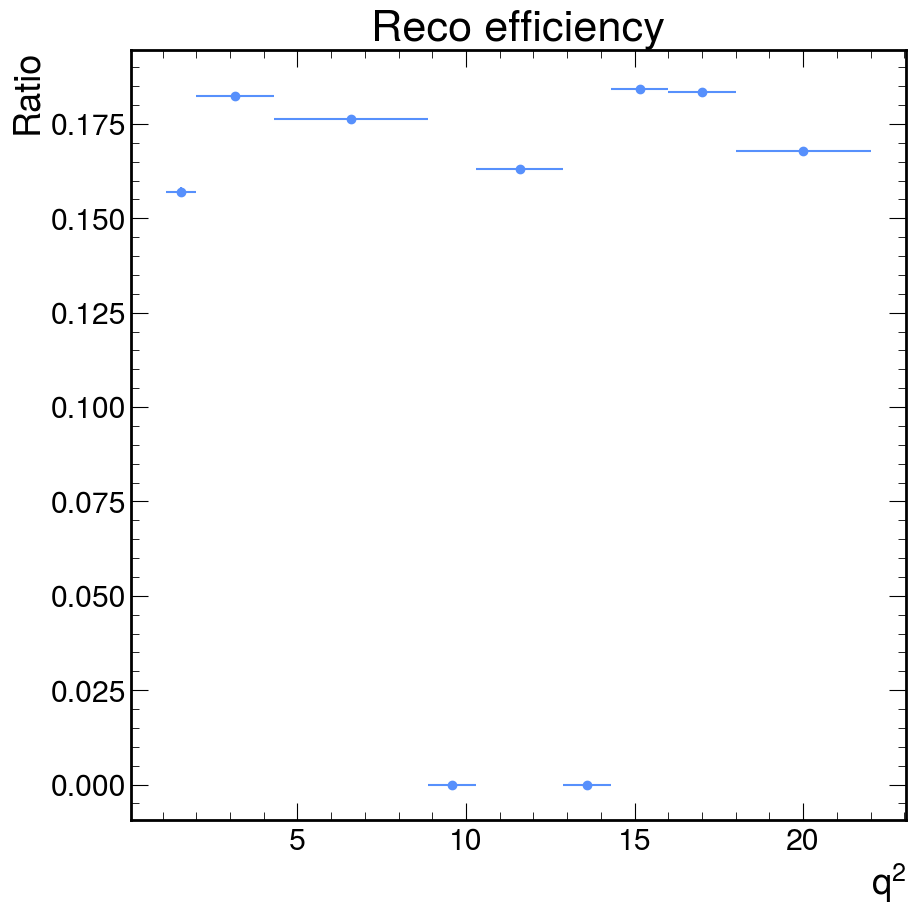

In [31]:
plt.figure()
bin_centers = (bindiv[1:] + bindiv[:-1]) / 2
bin_widths = np.diff(bindiv)
plt.errorbar(x=bin_centers, y=reco_eff, xerr=bin_widths / 2, yerr=reco_eff_err, fmt='')
plt.title("Reco efficiency")
plt.xlabel("$q^2$")
plt.ylabel("Ratio")
plt.show()

In [34]:
efficency = reco_eff * accep
print(efficency)

[0.00412467 0.00488853 0.00504733 0.         0.0054222  0.
 0.00716396 0.00774693 0.00837921]


In [39]:
eff_err = efficency * np.sqrt(((reco_eff_err/reco_eff)*(reco_eff_err/reco_eff))+((accepErr/accep)*(accepErr/accep)))
print(eff_err)

[5.11834063e-05 3.76650731e-05 2.68753534e-05            nan
 3.68097827e-05            nan 5.79685096e-05 5.83252896e-05
 5.20242515e-05]


/tmp/ipykernel_5204/3469582472.py:1: RuntimeWarning: invalid value encountered in divide
  eff_err = efficency * np.sqrt(((reco_eff_err/reco_eff)*(reco_eff_err/reco_eff))+((accepErr/accep)*(accepErr/accep)))


In [40]:
np.nan_to_num(eff_err,copy=False)
print(eff_err)

[5.11834063e-05 3.76650731e-05 2.68753534e-05 0.00000000e+00
 3.68097827e-05 0.00000000e+00 5.79685096e-05 5.83252896e-05
 5.20242515e-05]


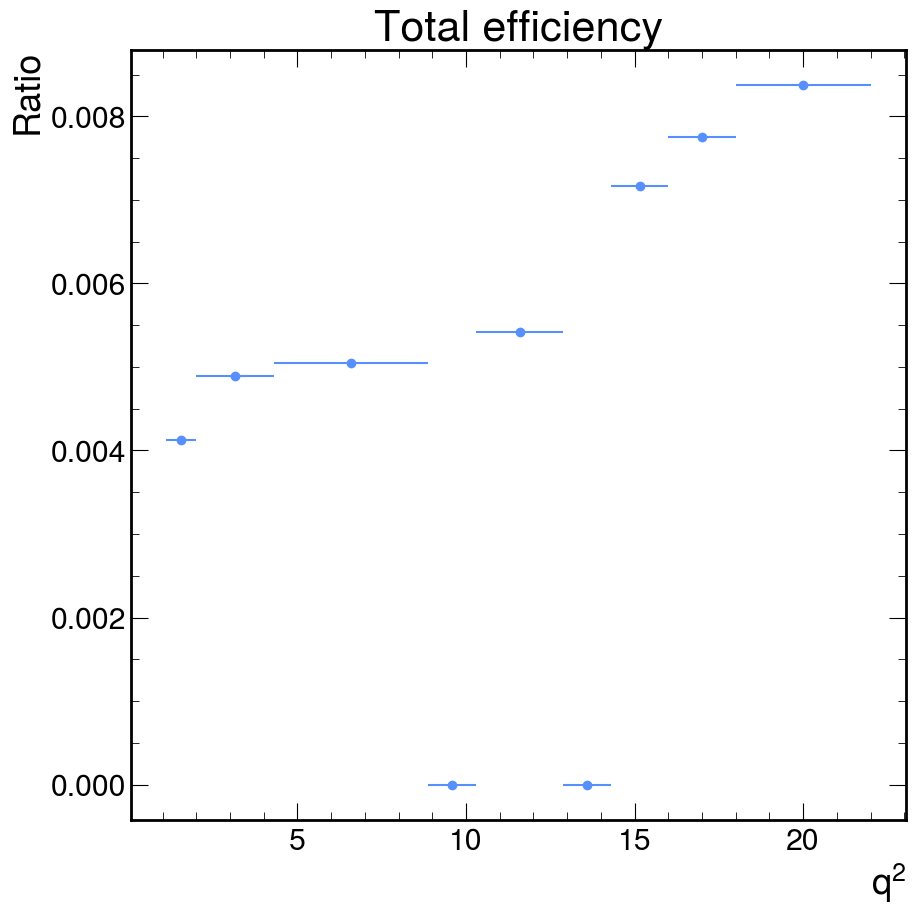

In [41]:
plt.figure()
bin_centers = (bindiv[1:] + bindiv[:-1]) / 2
bin_widths = np.diff(bindiv)
plt.errorbar(x=bin_centers, y=efficency, xerr=bin_widths / 2, fmt='o')
plt.title("Total efficiency")
plt.xlabel("$q^2$")
plt.ylabel("Ratio")
plt.show()

In [42]:
print("La eficiencia total global es: ", aceptancia*eficiencia_reco)

La eficiencia total global es:  0.004780557111334376
